In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cc_dataframe = pd.read_csv('BankChurners.csv')

cc_dataframe.loc[cc_dataframe['Marital_Status'] == 'Unknown', 'Marital_Status'] = 'Single'
cc_dataframe.loc[cc_dataframe['Education_Level'] == 'Unknown', 'Education_Level'] = 'Uneducated'
del cc_dataframe["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
del cc_dataframe["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]

In [54]:
#Table for reference
cc_dataframe.sample(100)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9341,713758758,1,48,M,2,High School,Married,Less than $40K,Silver,36,...,2,2,14581.0,2517,12064.0,0.776,17628,109,0.817,0.173
4749,771529608,1,50,M,2,High School,Married,$120K +,Blue,38,...,6,0,10747.0,1027,9720.0,0.925,4538,63,0.658,0.096
3899,716931183,1,45,M,5,Uneducated,Single,$80K - $120K,Blue,38,...,4,4,7560.0,788,6772.0,1.193,4296,68,0.700,0.104
5938,789328083,0,42,F,4,High School,Married,Less than $40K,Blue,32,...,3,3,3454.0,0,3454.0,0.862,2826,39,0.625,0.000
876,718050033,1,54,M,2,College,Married,$120K +,Blue,43,...,2,3,5657.0,1719,3938.0,0.606,2028,55,0.667,0.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,753208833,1,43,F,5,Uneducated,Married,$40K - $60K,Blue,36,...,3,2,2311.0,1320,991.0,0.658,3967,71,0.690,0.571
6377,788734158,1,42,M,4,Graduate,Married,$40K - $60K,Blue,19,...,3,2,8374.0,0,8374.0,0.885,4493,59,1.034,0.000
4522,717967833,1,55,F,1,Uneducated,Married,Less than $40K,Blue,36,...,1,0,2677.0,1555,1122.0,0.639,4757,81,0.688,0.581
958,721051908,1,45,M,3,Graduate,Single,$60K - $80K,Blue,33,...,1,3,7552.0,0,7552.0,0.463,1393,32,0.455,0.000


In [5]:
print("Basic Information about the table:")
print("")
print("Dimentions:", cc_dataframe.shape)
print("")
print("Basic Staticical information:\n", cc_dataframe.describe())
print("")
print("Checking for null values:")
print(cc_dataframe.info())

Basic Information about the table:

Dimentions: (10127, 21)

Basic Staticical information:
           CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000          

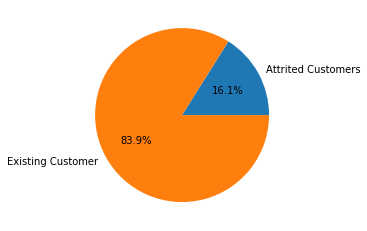

In [90]:
#Plot 1: Percent of People who are attrited vs Existing Customers
customer_attrition = cc_dataframe.groupby('Attrition_Flag')['CLIENTNUM'].count()
label_names = ['Attrited Customers','Existing Customer']
plt.pie(x = customer_attrition, autopct="%.1f%%", labels= label_names)
plt.show()

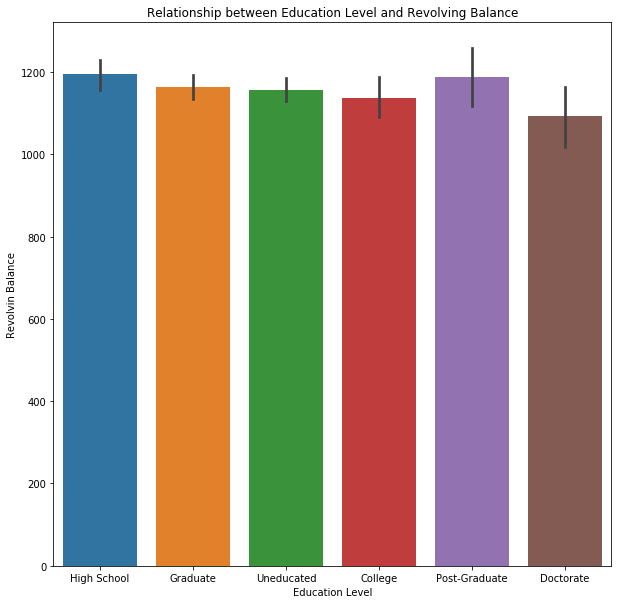

In [91]:
#plot 2: relationship between the education level and the total revolving balance
fig = plt.figure()
fig.set_figwidth(10) 
fig.set_figheight(10)
sns.barplot(x= 'Education_Level', y= 'Total_Revolving_Bal', data= cc_dataframe)
plt.xlabel("Education Level")
plt.ylabel("Revolvin Balance")
plt.title("Relationship between Education Level and Revolving Balance")
plt.show()

We can see that education level has relatively low correlation to the revolving balance

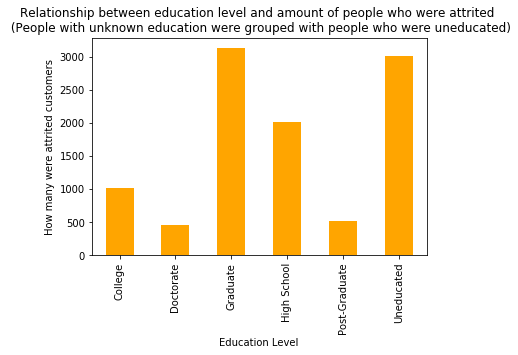

In [92]:
#Plot 3: Relationship between the Education level and amount of people Attrited
Educ_vs_flag = cc_dataframe.groupby('Education_Level')['Attrition_Flag'].count()
Educ_vs_flag.plot(kind= 'bar', color= 'orange')
plt.xlabel('Education Level')
plt.ylabel('How many were attrited customers')
plt.title("Relationship between education level and amount of people who were attrited \n (People with unknown education were grouped with people who were uneducated)")
plt.show()

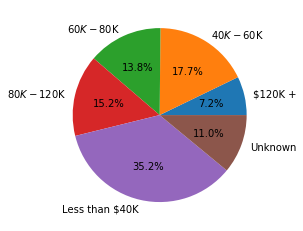

In [19]:
#plot 4: Relationship between income level and Attrition Flag
inclevel_vs_aflag = cc_dataframe.groupby('Income_Category')['Attrition_Flag'].count()
names = inclevel_vs_aflag.keys()
plt.pie(x = inclevel_vs_aflag, autopct="%.1f%%", labels= names)
plt.show()

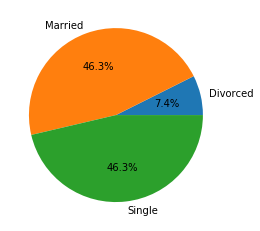

In [26]:
#Plot 5: General Information about the marital status in the bank(May need to delete as it is not really required...)
marital_stat = cc_dataframe.groupby('Marital_Status')['CLIENTNUM'].count()
marital_stat_keys = marital_stat.keys()
plt.pie(x= marital_stat, autopct="%.1f%%", labels= marital_stat_keys)
plt.show()

0 represents Attrited Customers and 1 represents Existing Customers


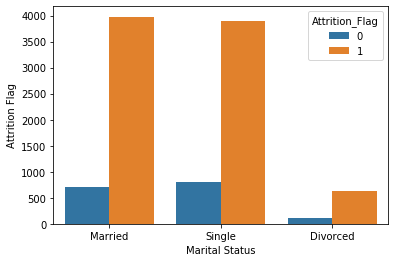

In [68]:
# Plot 6: Relationship between marital status and the attriation flag
cc_dataframe.loc[cc_dataframe['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'] = 1
cc_dataframe.loc[cc_dataframe['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'] = 0
sns.countplot(x= 'Marital_Status', hue= 'Attrition_Flag', data= cc_dataframe)
plt.ylabel('Attrition Flag')
plt.xlabel('Marital Status')
print("0 represents Attrited Customers and 1 represents Existing Customers")
plt.show()

In [69]:
#FEATURE ENGINEERING

cc_dataframe.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,F,4,High School,Single,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,1,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,1,51,M,4,Uneducated,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,1,32,M,0,High School,Single,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,1,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,1,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [83]:
def generation(age):
    if(75 <= age <= 95):
        return "Silent Generation"
    elif(56 <= age <= 74):
        return "Baby Boomer"
    elif(41 <= age <= 55):
        return "Generation X"
    elif(26 <= age <= 40):
        return "Generation Y"
    elif(8 <= age <= 25):
        return "Generation Z"
cc_dataframe['Generation'] = cc_dataframe['Customer_Age'].map(lambda x: generation(x))
cc_dataframe
#need to showcase a plot regarding this

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Generation
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Generation X
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Generation X
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Generation X
3,769911858,1,40,F,4,High School,Single,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Generation Y
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Generation Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,Generation X
10123,710638233,0,41,M,2,Uneducated,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,Generation X
10124,716506083,0,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,Generation X
10125,717406983,0,30,M,2,Graduate,Single,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,Generation Y
